In [24]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# 2. Load Dataset
glass_df = pd.read_csv('glass.csv')

In [32]:
# 3. Data Cleaning and Preprocessing
X = glass_df.drop(columns=['idno', 'type'])  # drop ID and target
y = glass_df['type']  # target label

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]], shape=(214, 9))

Number of components to retain 90% variance: 6


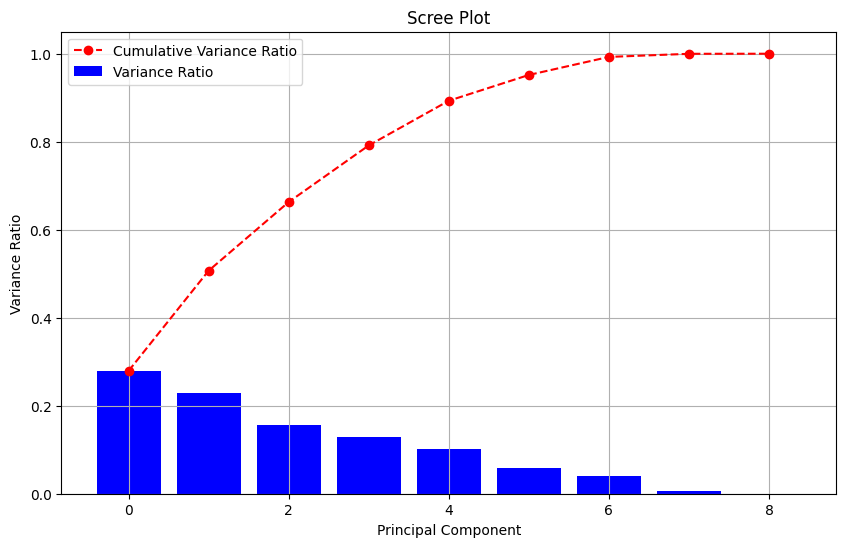

In [27]:
# 4. PCA Analysis - Determine number of components with at least 90% variance
pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components_90}")

# 5. Scree Plot (optional visualization)
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--', label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

scree_plot(pca)

In [28]:
# 6. Train-Test Split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [29]:
# 7. Model with All Features
model_full = GaussianNB()
model_full.fit(X_train_full, y_train)
y_pred_full = model_full.predict(X_test_full)
print("=== Model with All Features ===")
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full))

# Cross-validation (8-fold)
cv_full = cross_val_score(model_full, X_scaled, y, cv=8)
print("8-Fold CV Accuracy (All Features):", np.mean(cv_full))

=== Model with All Features ===
Accuracy: 0.2558139534883721
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.57      0.31      0.40        13
           3       0.11      0.75      0.19         4
           5       0.33      0.33      0.33         3
           6       0.50      1.00      0.67         2
           7       1.00      0.25      0.40         4

    accuracy                           0.26        43
   macro avg       0.42      0.44      0.33        43
weighted avg       0.32      0.26      0.23        43

8-Fold CV Accuracy (All Features): 0.4148860398860399


In [30]:
# 8. PCA Transformation (retain 90% variance)
pca = PCA(n_components=n_components_90)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [31]:
# 9. Model with PCA-Reduced Features
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print("\n=== Model with PCA-Reduced Features ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# Cross-validation (8-fold) on PCA data
cv_pca = cross_val_score(model_pca, X_pca, y, cv=8)
print("8-Fold CV Accuracy (PCA Features):", np.mean(cv_pca))


=== Model with PCA-Reduced Features ===
Accuracy: 0.37209302325581395
              precision    recall  f1-score   support

           1       0.46      0.65      0.54        17
           2       0.33      0.38      0.36        13
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4

    accuracy                           0.37        43
   macro avg       0.13      0.17      0.15        43
weighted avg       0.28      0.37      0.32        43

8-Fold CV Accuracy (PCA Features): 0.5001780626780628


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif